<a href="https://colab.research.google.com/github/Geek-a-Byte/ML-sessional/blob/main/lab7/SequentialAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense, Input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Preparing my layers
input=Input(shape=2)
layer1=Dense(units=10,activation='relu',use_bias=True,name="first_dense_layer")
layer2=Dense(units=12,activation='relu',use_bias=True)
layer3=Dense(units=12,activation='relu',use_bias=True)
layer4=Dense(units=1,activation='relu',use_bias=True)

In [ ]:
# Let us check the weights in the layers
print(layer1.weights)
print(layer2.weights)
print(layer3.weights)

[]
[]
[]


In [ ]:
# Let us build the model
model=Sequential()
model.add(input)
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_dense_layer (Dense)   (None, 10)                30        
                                                                 
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dir(model)

In [ ]:
model._name

'sequential'

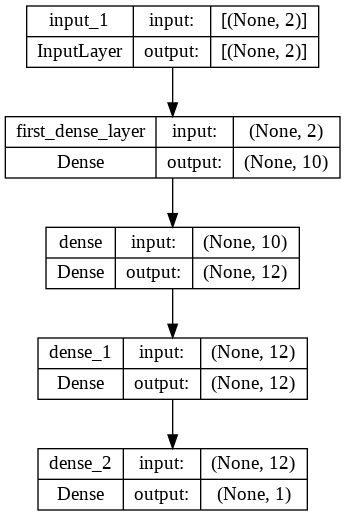

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Let us check the weights again
print(layer1.weights)
print(layer2.weights)
print(layer3.weights)

In [ ]:
import pandas
inputDataFrame=pandas.read_csv('/content/drive/MyDrive/MIST/Classes/CSE 442 ML Sessional/Week 11 - Deep Learning/DataDeepLearning.csv')
inputDataFrame

,x1,x2,y1=4*x1+5*x2+5,y2=10*x1+10*x2,y3=3*x1+10*x2
0,80,58,615,1380,820
1,19,87,516,1060,927
2,81,4,349,850,283
3,25,34,275,590,415
4,8,63,352,710,654
...,...,...,...,...,...
994,49,8,241,570,227
995,23,90,547,1130,969
996,85,23,460,1080,485
997,42,18,263,600,306


In [ ]:
x1s=inputDataFrame['x1'].to_numpy()
x2s=inputDataFrame['x2'].to_numpy()
y1s=inputDataFrame['y1=4*x1+5*x2+5'].to_numpy()
y2s=inputDataFrame['y2=10*x1+10*x2'].to_numpy()
y3s=inputDataFrame['y3=3*x1+10*x2'].to_numpy()

In [ ]:
x1s.shape

(999,)

In [ ]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)

In [ ]:
x1s.shape

(999, 1)

In [ ]:
x=np.concatenate((x1s,x2s),axis=0)

In [ ]:
print(x)

[[80]
 [19]
 [81]
 ...
 [23]
 [18]
 [52]]


In [ ]:
x.shape

(999, 2)

In [ ]:
print(x1s)
print(x2s)
print(y1s)
print(y2s)
print(y3s)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, y1sTrain, y1sTest, y2sTrain, y2sTest, y3sTrain, y3sTest = train_test_split(x, y1s,y2s,y3s, test_size=0.20, random_state=42)
print(f'x={xTrain[0]},y1={y1sTrain[0]},y2={y2sTrain[0]},y3={y3sTrain[1]}')


x=[36 65],y1=474,y2=1010,y3=510


In [ ]:
# configure the training
model.compile(loss='mse',metrics=['mae','mse'],optimizer=tf.optimizers.Adam(learning_rate=0.01))

In [ ]:
# train the model. just run a few epochs for this test run. you can adjust later.
model.fit(x=xTrain,y=y1sTrain,validation_data=(xTest, y1sTest),batch_size=16, epochs=10)

Epoch 1/10
50/50 [==============================] - 1s 7ms/step - loss: 243605.2500 - mae: 457.4318 - mse: 243605.2500 - val_loss: 239270.6406 - val_mae: 459.6850 - val_mse: 239270.6406
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 243605.2656 - mae: 457.4318 - mse: 243605.2656 - val_loss: 239270.6406 - val_mae: 459.6850 - val_mse: 239270.6406
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 243605.2188 - mae: 457.4318 - mse: 243605.2188 - val_loss: 239270.6406 - val_mae: 459.6850 - val_mse: 239270.6406
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 243605.2656 - mae: 457.4318 - mse: 243605.2656 - val_loss: 239270.6406 - val_mae: 459.6850 - val_mse: 239270.6406
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 243605.2656 - mae: 457.4318 - mse: 243605.2656 - val_loss: 239270.6406 - val_mae: 459.6850 - val_mse: 239270.6406
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss

In [ ]:
y1sTest[60]

697

In [ ]:
xTest[60].shape

(2,)

In [ ]:
input=xTest[60].reshape(1,2)

In [ ]:
input

array([[68, 84]])

In [ ]:
input.shape

(1, 2)

In [ ]:
y1Pred=model.predict(input)

1/1 [==============================] - 0s 74ms/step


In [ ]:
y1Pred

array([[0.]], dtype=float32)